# Sample solutions for Exercise 5

Course: Scientific Programming (Python) by Bálint Aradi, University of Bremen

In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

## Visualizing QM results

In [3]:
def read_qm_result(directory):
    """Reads in the data of a QM-calculation.
    
    Args:
        directory: Directory containing the files with the QM-calculation details.
            (energies.dat, discrpot.dat, wfuncs.dat)
    
    Returns:
        Dictionary with keys "energies", "xgrid", "potential", "wavefuncs", containing
        eigenenergies, x-grid, potential values on the grid, wavefunction values on the grid.
    """
    directory = Path(directory)
    energies_dat = np.loadtxt(directory / 'energies.dat')
    discrpot_dat = np.loadtxt(directory / 'discrpot.dat')
    wfuncs_dat = np.loadtxt(directory / 'wfuncs.dat')
    energies = energies_dat
    xx = discrpot_dat[:,0]
    potential = discrpot_dat[:,1]
    wavefuncs = wfuncs_dat[:,1:]
    result = {"energies": energies, "xgrid": xx, "potential": potential, "wavefuncs": wavefuncs}
    return result

In [4]:
def plot_qm_result(ax, name, energies, xx, potential, wavefuncs, prefactor=1.0, xlim=None, ylim=None):
    """Visualizes the results of a QM-calculation (1D, one-particle, non-relativistic).
    
    It plots the electron potential and the eigenstates shifted with their corresponding eigenenergies.
    
    Args:
        ax: Axes object representing the plot
        name: Name of the system (for plot title)
        energies: Calculated eigenenergies
        xx: X-values of the 1D-grid, on wich potential and wavefunctions are represented.
        potential: Potential values on the grid.
        wavefuncs: Wave functions values on the grid.
        prefactor: Scaling factor for the wave functions (default: 1.0)
        xlim: Minimal and maximal x-values to show (default: actual plt.xlim values)
        ylim: Minimal and maximal y-values to show (default: actual plt.ylim values)
    """
    
    if xlim is None:
        xmin, xmax = ax.get_xlim()
    else:
        xmin, xmax = xlim
        ax.set_xlim(xmin, xmax)
    
    if ylim is None:
        ymin, ymax = ax.get_ylim()
    else:
        ymin, ymax = ylim
        ax.set_ylim(ymin, ymax)
        
    ax.set_title(name)
    ax.set_xlabel("x [Bohr]")
    ax.set_ylabel("Energy [Hartree]")
    
    ax.plot(xx, potential, linewidth=1.5, linestyle="-", color="black")
    
    colors = ["blue", "red"]
    for ienerg in range(len(energies)):
        energy = energies[ienerg]
        wavefunc = wavefuncs[:, ienerg]
        color = colors[ienerg % len(colors)]
        ax.plot([xmin, xmax], [energy, energy], linewidth=0.5, linestyle="-", color='grey')
        ax.plot(xx, prefactor * wavefunc + energy, linewidth=1.0, linestyle="-", color=color)


### Harmonic oscillator

In [5]:
data = read_qm_result("schroedinger/harmonic")

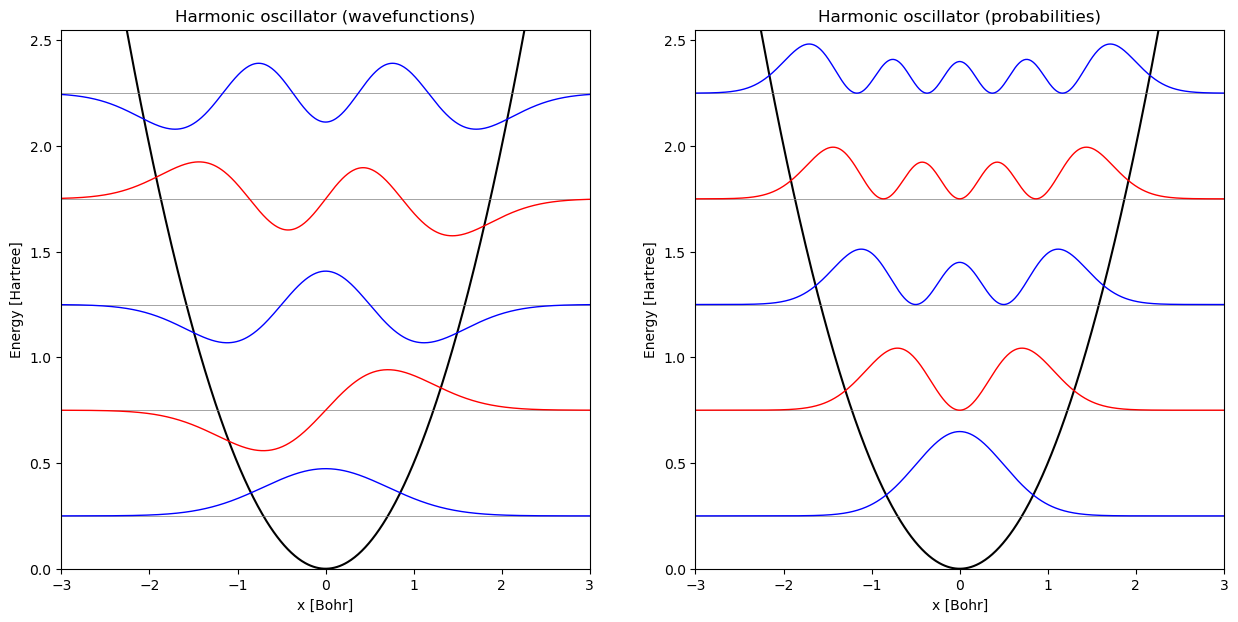

In [6]:
xlim = -3.0, 3.0
ylim = 0.0, 2.55
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 7)
plot_qm_result(ax1, "Harmonic oscillator (wavefunctions)", data["energies"], data["xgrid"],
               data["potential"], data["wavefuncs"],
               prefactor=2.5, xlim=xlim, ylim=ylim)
probabilities = np.abs(data["wavefuncs"])**2
plot_qm_result(ax2, "Harmonic oscillator (probabilities)", data["energies"], data["xgrid"],
               data["potential"], probabilities,
               prefactor=50, xlim=xlim, ylim=ylim)
fig.savefig("harmonic.pdf")

### Double well

In [7]:
data = read_qm_result("schroedinger/double_well")

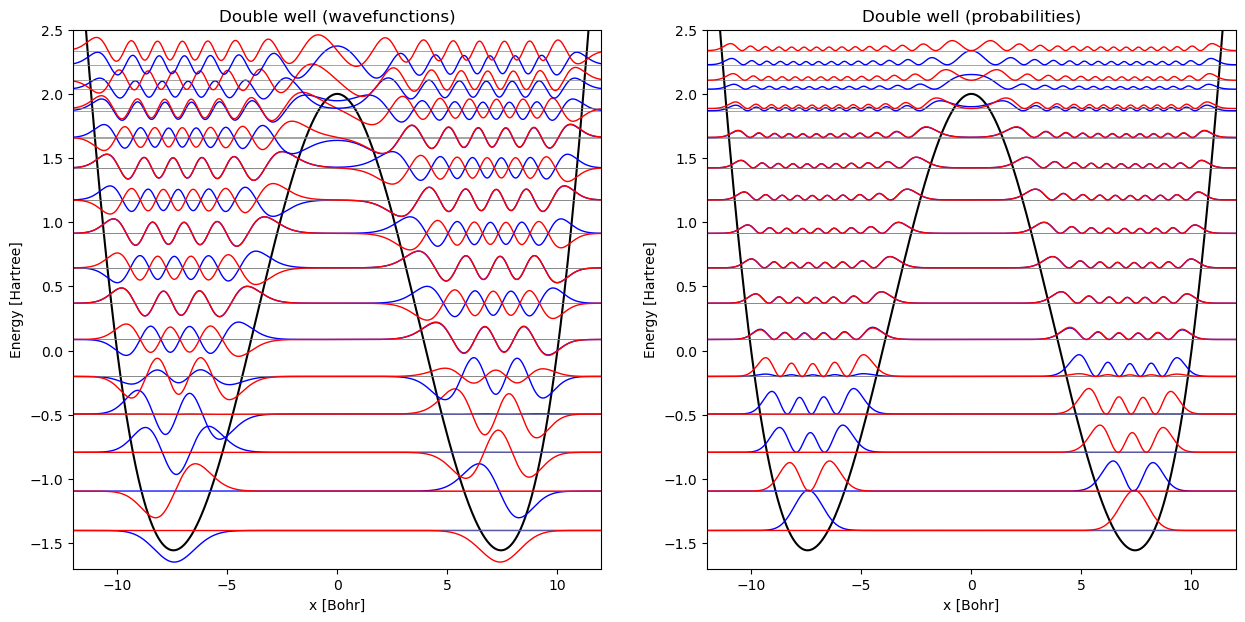

In [8]:
xlim = -12.0, 12.0
ylim = -1.7, 2.5
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 7)
plot_qm_result(ax1, "Double well (wavefunctions)", data["energies"], data["xgrid"],
               data["potential"], data["wavefuncs"],
               prefactor=2.2, xlim=xlim, ylim=ylim)
probabilities = np.abs(data["wavefuncs"])**2
plot_qm_result(ax2, "Double well (probabilities)", data["energies"], data["xgrid"],
               data["potential"], probabilities,
               prefactor=25, xlim=xlim, ylim=ylim)
fig.savefig("double_well.pdf")

### Infinite well

In [9]:
data = read_qm_result("schroedinger/inf_well")

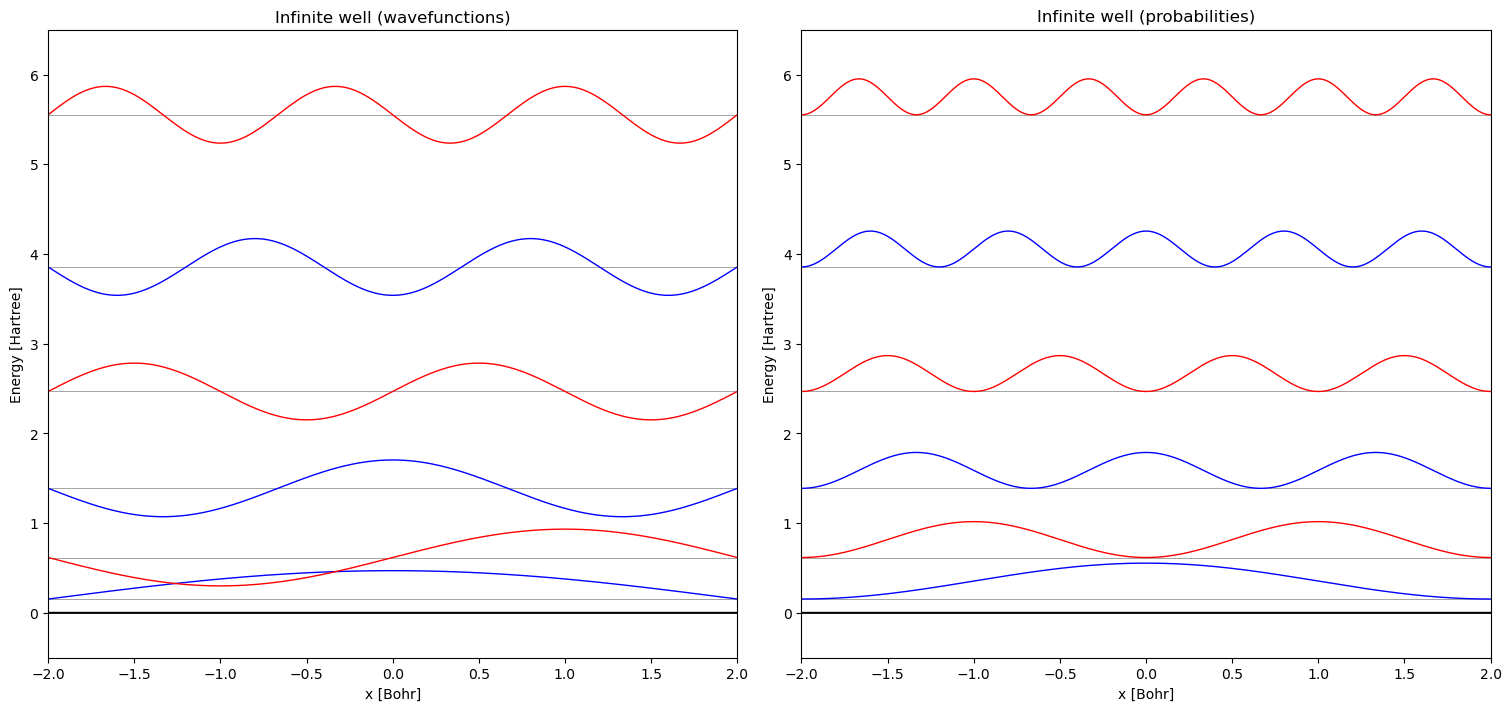

In [10]:
xlim = -2.0, 2.0
ylim = -0.5, 6.5
fig, (ax1, ax2) = plt.subplots(1, 2, layout="constrained")
fig.set_size_inches(15, 7)
plot_qm_result(ax1, "Infinite well (wavefunctions)", data["energies"], data["xgrid"],
               data["potential"], data["wavefuncs"],
               prefactor=10.0, xlim=xlim, ylim=ylim)
probabilities = np.abs(data["wavefuncs"])**2
plot_qm_result(ax2, "Infinite well (probabilities)", data["energies"], data["xgrid"],
               data["potential"], probabilities,
               prefactor=400, xlim=xlim, ylim=ylim)
fig.savefig("inf_well.pdf")